# analysis/generate classes

In [1]:
import os
os.chdir("../..") # Change to parent directory
assert "struc2vec" in os.listdir()

In [54]:
import networkx as nx
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from struc2vec.src import struc2vec as s2v
from struc2vec.src.Helpers import *
import json

In [3]:
os.chdir("structuralNetworkMigration")
assert "data" in os.listdir()

## Load data

In [4]:
G = {"0":None,"25":None,"50":None, "75":None}

for perc, graph in G.items():
    G[perc] =  nx.read_gexf(f"data/Graphs/bynode_{perc}_directed.gexf")

In [5]:
s2vG_dict = {}
for perc, graph in G.items():
    s2vG_dict[perc] = s2v.struc2vec(graph)

In [6]:
for perc, s2vG in s2vG_dict.items():
    s2vG.getMultiLevelGraph(path=f"data/GML/{perc}")

# Final embedding and generation of classifications
For hyperparameter testing see below this section

In this section I will outline the final steps for creating the classifications
1) Create the context - random walks on the context graph - and embedding.
2) Create scree plot
3) Create classifications with PCA
4) Finally save embeddings and classifications

In [46]:
walks = []
for perc, s2vG in s2vG_dict.items():
    n_walk = 1000
    if (perc == "25")|(perc=="50"):
        n_walk = 1500
    walks_ = s2vG.getRandomWalks(number_of_walks = n_walk, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)



In [47]:
pca = PCA(n_components=10)
pca.fit(X)
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

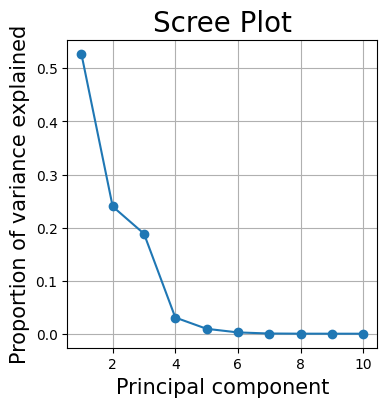

In [48]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal component',
           size = 15)
plt.ylabel('Proportion of variance explained',
           size = 15)
plt.title('Scree Plot',
          size = 20)
plt.grid(True)

In [50]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,83,0.677,0.001,0.402,10.036,15.361,31.259
1,60,0.536,0.010,0.418,77.817,57.900,2.318
2,83,0.604,0.002,0.515,33.675,42.747,2.045


In [ ]:
# pd.DataFrame(zip(nodes_00,embedding_00), columns=["Node", "Embedding"]).to_excel("embeddings/all_nw500_1000_wl80_vs75_pca3.xlsx")

### Save it as json file

In [55]:
# Embeddings
embedding_data = {k: str(list(v)) for k, v in embeddings.items()}
with open("data/embeddings/node2emb.json", "w") as f:
    json.dump(embedding_data, f)

In [58]:
class_data = {node:class_ for node, class_ in zip(nodes_00,embedding_00)}
with open("data/embeddings/node2class.json", "w") as f:
    json.dump(class_data, f)

## Initial analysis for comparison

In [17]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

In [18]:
model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

In [19]:
pca = PCA(n_components=10)
pca.fit(X)
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

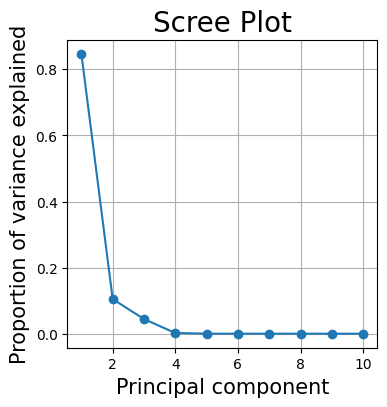

In [20]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal component',
           size = 15)
plt.ylabel('Proportion of variance explained',
           size = 15)
plt.title('Scree Plot',
          size = 20)
plt.grid(True)

In [21]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

In [22]:
nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,101,0.685,0.001,0.384,9.485,18.416,26.356
1,50,0.498,0.012,0.454,87.800,61.580,2.024
2,75,0.591,0.002,0.531,39.320,44.773,1.869


## s2vGXX

In [24]:
walks = s2vG_dict["75"].getRandomWalks(number_of_walks = 500, walk_length=40)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["75"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["75"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["75"], nodes_00,embedding_00)
meta_group

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,110,0.481,0.007,0.213,9.327,8.909,0.183
1,57,0.465,0.003,0.124,4.070,8.614,0.196
2,54,0.390,0.007,0.245,13.444,9.500,0.158


In [ ]:
walks = s2vG_dict["50"].getRandomWalks(number_of_walks = 500, walk_length=40)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["50"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["50"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group= get_meta_data(G["50"], nodes_00,embedding_00)
meta_group

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,96,0.539,0.004,0.334,25.292,17.094,0.125
1,71,0.488,0.008,0.427,21.845,22.113,0.076
2,59,0.616,0.001,0.172,1.881,14.898,0.141


In [29]:
walks = s2vG_dict["25"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["25"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["25"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["25"], nodes_00,embedding_00)
meta_group

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,101,0.576,0.006,0.441,40.574,25.792,0.093
1,67,0.551,0.005,0.475,27.119,32.955,0.051
2,58,0.665,0.000,0.230,3.741,22.741,0.099


In [30]:
walks = s2vG_dict["0"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,73,0.542,0.008,0.494,75.370,48.356,7.125
1,78,0.676,0.001,0.342,7.987,25.462,24.847
2,75,0.615,0.003,0.513,28.960,37.080,5.935


## Hyperparameters of RW

### Number of walks

In [31]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,74,0.683,0.000,0.404,9.973,12.946,34.237
1,61,0.545,0.010,0.398,73.377,56.508,2.365
2,91,0.602,0.002,0.517,33.879,42.769,2.478


In [32]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,66,0.462,0.011,0.641,96.727,58.803,1.205
1,81,0.652,0.001,0.447,14.259,16.099,30.593
2,79,0.698,0.001,0.288,9.595,39.392,4.377


### Walk length

In [33]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=60)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,104,0.707,0.000,0.310,7.067,23.510,22.952
1,89,0.592,0.002,0.520,34.506,40.494,5.359
2,33,0.372,0.019,0.689,136.091,68.121,1.193


In [34]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,111,0.532,0.007,0.585,66.622,49.577,1.928
1,54,0.709,0.000,0.188,3.833,39.333,5.874
2,61,0.674,0.000,0.428,11.393,10.984,38.886


In [ ]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,63,0.454,0.011,0.646,99.270,59.937,1.228
1,89,0.651,0.001,0.473,16.517,19.573,27.989
2,74,0.703,0.001,0.250,7.743,37.554,4.526


### W2V Vector size

In [37]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,121,0.676,0.001,0.409,11.893,21.041,22.369
1,51,0.630,0.002,0.316,25.588,52.804,2.408
2,54,0.454,0.012,0.661,102.833,56.630,1.367


In [38]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,101,0.519,0.008,0.597,71.683,51.525,1.686
1,49,0.712,0.000,0.143,2.265,40.061,5.342
2,76,0.673,0.001,0.447,12.447,14.868,32.518


### Testing combinations

In [39]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,64,0.460,0.011,0.647,98.656,59.219,1.217
1,75,0.657,0.001,0.445,14.360,14.653,32.369
2,87,0.687,0.001,0.305,10.414,39.172,4.572


In [40]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,85,0.678,0.000,0.402,10.388,15.447,30.662
1,57,0.536,0.011,0.414,78.211,58.877,2.055
2,84,0.599,0.002,0.518,35.190,43.190,2.142


In [ ]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,108,0.671,0.001,0.425,12.750,24.009,15.473
1,57,0.641,0.002,0.295,25.123,52.439,2.206
2,61,0.483,0.011,0.631,89.967,44.508,18.139


In [42]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1500, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00)
meta_group

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,67,0.463,0.011,0.639,95.343,58.806,1.230
1,90,0.653,0.001,0.448,14.556,17.967,27.812
2,69,0.707,0.001,0.263,8.681,39.710,4.607


## For viz

In [43]:
walks = []
for perc, s2vG in s2vG_dict.items():
    n_walk = 1000
    if (perc == "25")|(perc=="50"):
        n_walk = 1500
    walks_ = s2vG.getRandomWalks(number_of_walks = n_walk, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00,cmap=cmap)
meta_group

,Number of nodes,Color,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,,
0,74,lightblue,0.475,0.010,0.634,89.459,53.851,4.063
1,69,lightyellow,0.722,0.000,0.209,3.319,26.000,30.680
2,83,orange,0.645,0.001,0.480,17.446,30.337,5.852


In [ ]:
# pd.DataFrame(zip(nodes_00,embedding_00), columns=["Node", "Embedding"]).to_excel("embeddings/all_nw500_1000_wl80_vs75_pca4.xlsx")

### Visualization

In [44]:
cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
nodecolors = [cmap[v] for k,v in index_embeddings.items()]
weights = [edge[2]["weight"] for edge in G["0"].edges(data=True)]
weights_scaled = scale_weights(weights)

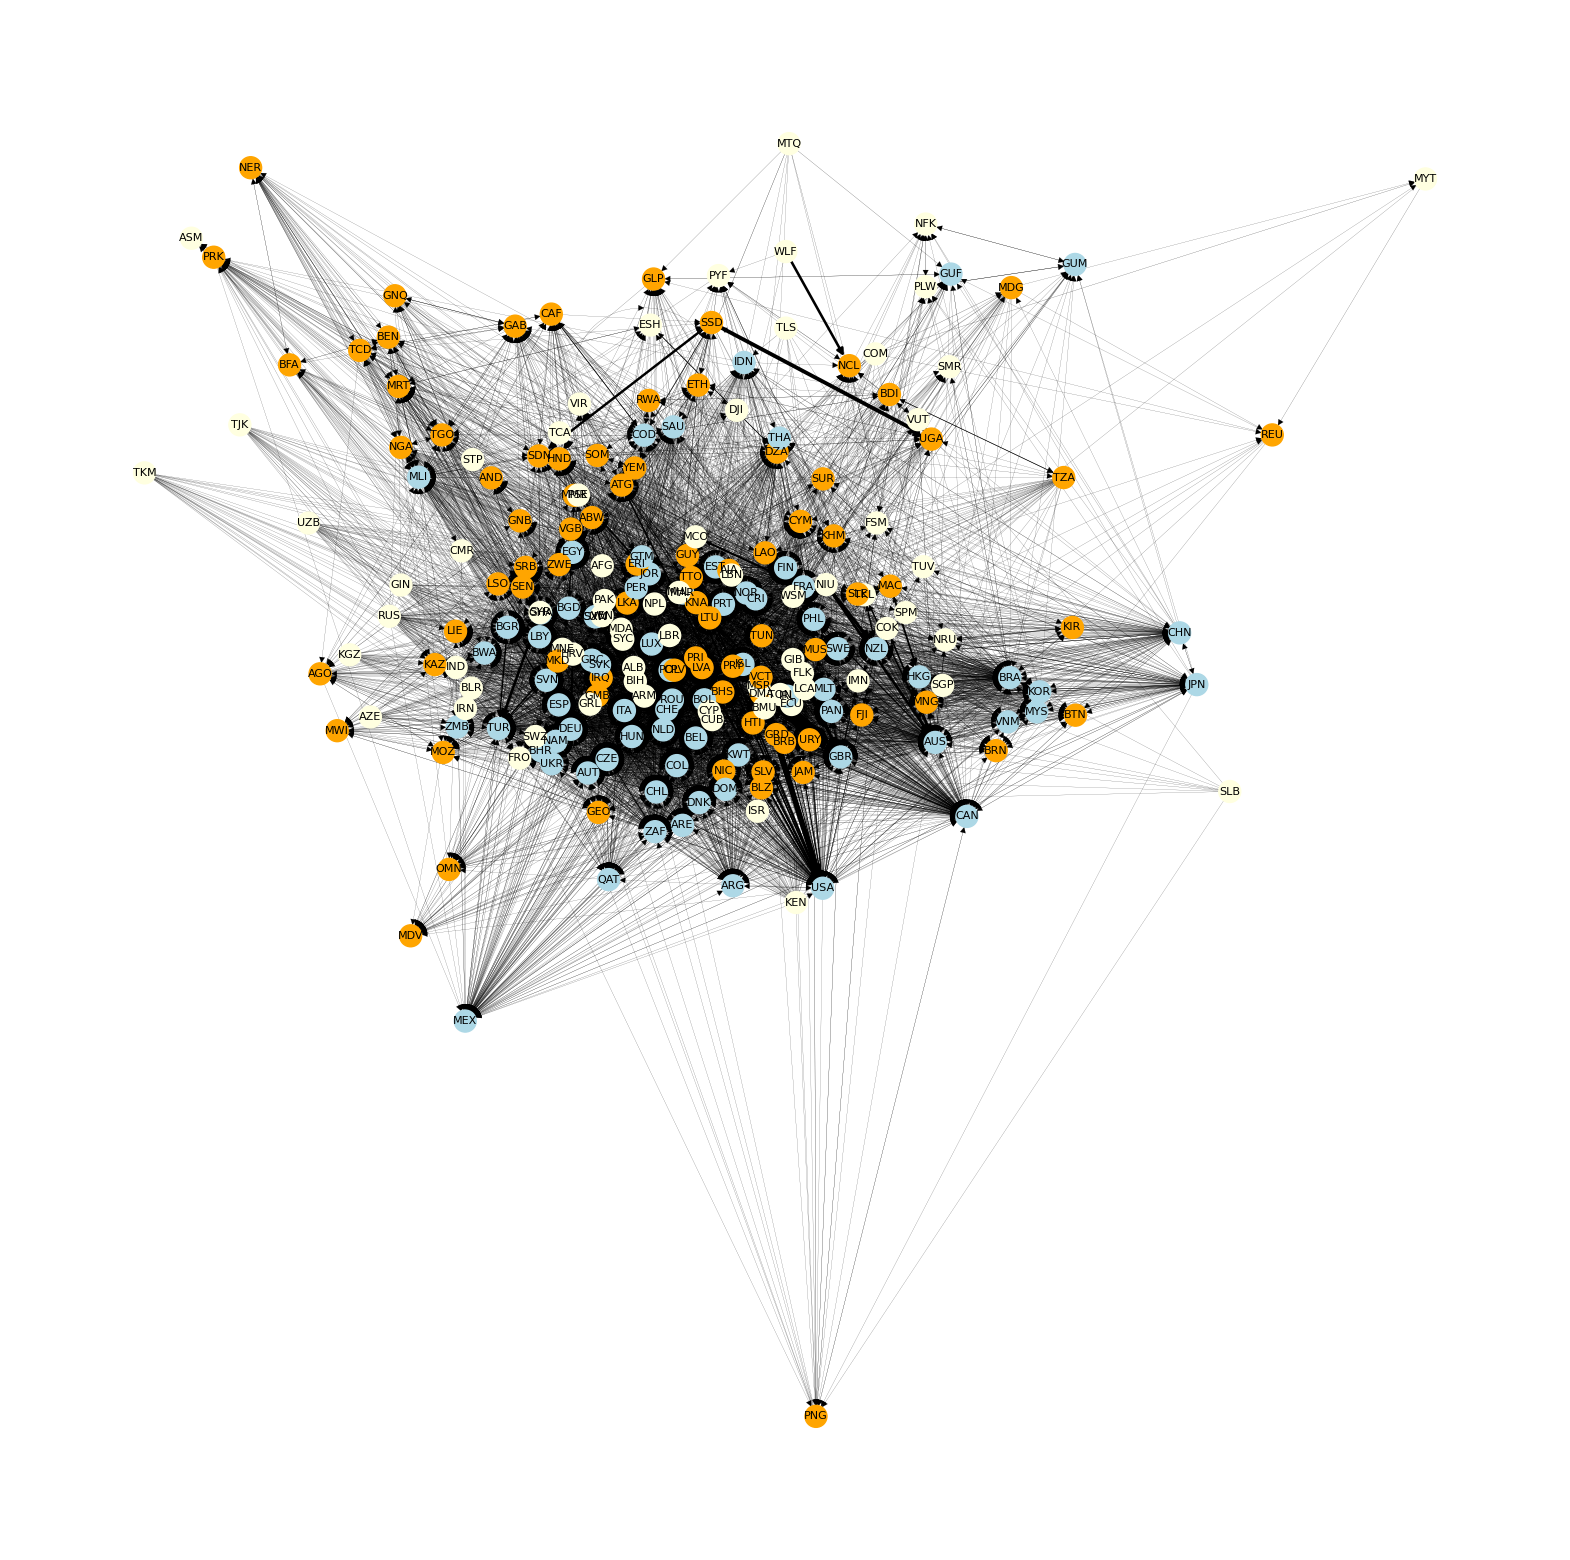

In [45]:
fig, ax = plt.subplots(figsize=(20,20))

nx.draw_spring(G["0"], with_labels=True, node_color=nodecolors, width = weights_scaled, node_size=250, font_size=8)